In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carica il tuo dataset CSV
path = 'Churn_Modelling.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['RowNumber'].nunique() == df['CustomerId'].nunique()

True

In [5]:
df.rename(columns={'RowNumber':'USER_ID'}, inplace=True)
df

,USER_ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.dtypes

USER_ID              int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Trasformazione in Booleano per la colonna Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df

,USER_ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.dtypes

USER_ID              int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# Add timestamp (2023)
date_range = pd.date_range(start='2023-01-01', end='2023-12-31')

# random date for every row
num_rows = len(df)
random_dates = np.random.choice(date_range, size=num_rows)

# Aggiungiamo la colonna 'time_stamp' al DataFrame
df['event_timestamp'] = random_dates

In [10]:
cols = ['event_timestamp'] + [col for col in df if col != 'event_timestamp']
df = df[cols]
df

,event_timestamp,USER_ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2023-04-14,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2023-03-12,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,2023-03-20,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,2023-12-17,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,2023-07-19,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-11-06,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,2023-06-12,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,2023-02-21,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,2023-06-10,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


C:\Users\claud\AppData\Local\Temp\ipykernel_5784\738490355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['event_timestamp'].dt.date


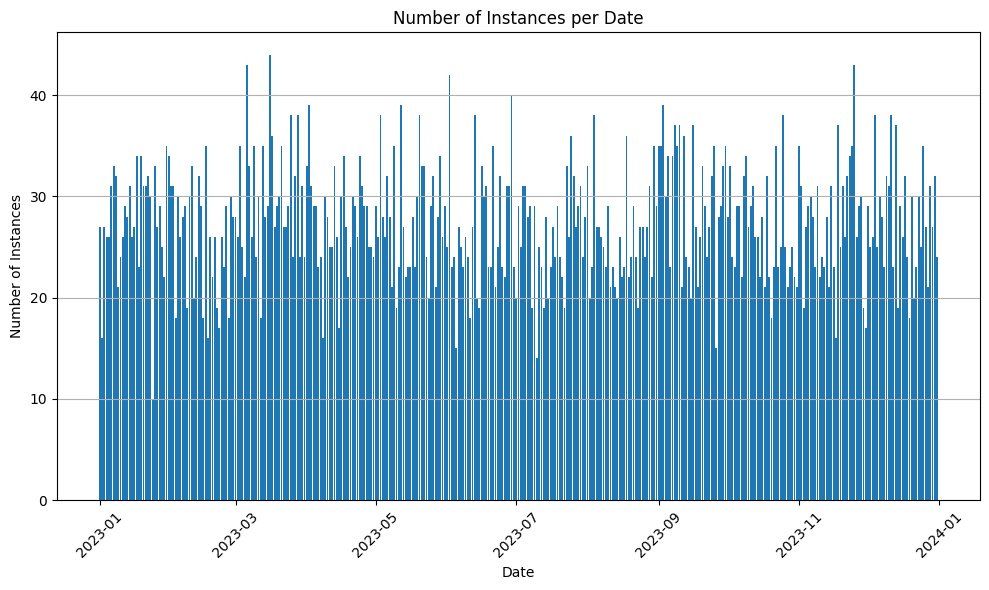

In [11]:
# Graph to show the number of intances for date
df['date'] = df['event_timestamp'].dt.date

date_counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Date')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [12]:
df = df.drop(columns=['CustomerId', 'Surname'])

In [13]:
df

,event_timestamp,USER_ID,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,date
0,2023-04-14,1,619,France,0,42,2,0.00,1,1,1,101348.88,1,2023-04-14
1,2023-03-12,2,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,2023-03-12
2,2023-03-20,3,502,France,0,42,8,159660.80,3,1,0,113931.57,1,2023-03-20
3,2023-12-17,4,699,France,0,39,1,0.00,2,0,0,93826.63,0,2023-12-17
4,2023-07-19,5,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,2023-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-11-06,9996,771,France,1,39,5,0.00,2,1,0,96270.64,0,2023-11-06
9996,2023-06-12,9997,516,France,1,35,10,57369.61,1,1,1,101699.77,0,2023-06-12
9997,2023-02-21,9998,709,France,0,36,7,0.00,1,0,1,42085.58,1,2023-02-21
9998,2023-06-10,9999,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,2023-06-10


In [14]:
df = pd.get_dummies(df, columns=['Geography'])
df

,event_timestamp,USER_ID,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,date,Geography_France,Geography_Germany,Geography_Spain
0,2023-04-14,1,619,0,42,2,0.00,1,1,1,101348.88,1,2023-04-14,True,False,False
1,2023-03-12,2,608,0,41,1,83807.86,1,0,1,112542.58,0,2023-03-12,False,False,True
2,2023-03-20,3,502,0,42,8,159660.80,3,1,0,113931.57,1,2023-03-20,True,False,False
3,2023-12-17,4,699,0,39,1,0.00,2,0,0,93826.63,0,2023-12-17,True,False,False
4,2023-07-19,5,850,0,43,2,125510.82,1,1,1,79084.10,0,2023-07-19,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-11-06,9996,771,1,39,5,0.00,2,1,0,96270.64,0,2023-11-06,True,False,False
9996,2023-06-12,9997,516,1,35,10,57369.61,1,1,1,101699.77,0,2023-06-12,True,False,False
9997,2023-02-21,9998,709,0,36,7,0.00,1,0,1,42085.58,1,2023-02-21,True,False,False
9998,2023-06-10,9999,772,1,42,3,75075.31,2,1,0,92888.52,1,2023-06-10,False,True,False


In [15]:
df.dtypes

event_timestamp      datetime64[ns]
USER_ID                       int64
CreditScore                   int64
Gender                        int64
Age                           int64
Tenure                        int64
Balance                     float64
NumOfProducts                 int64
HasCrCard                     int64
IsActiveMember                int64
EstimatedSalary             float64
Exited                        int64
date                         object
Geography_France               bool
Geography_Germany              bool
Geography_Spain                bool
dtype: object

In [16]:
df.head()

,event_timestamp,USER_ID,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,date,Geography_France,Geography_Germany,Geography_Spain
0,2023-04-14,1,619,0,42,2,0.00,1,1,1,101348.88,1,2023-04-14,True,False,False
1,2023-03-12,2,608,0,41,1,83807.86,1,0,1,112542.58,0,2023-03-12,False,False,True
2,2023-03-20,3,502,0,42,8,159660.80,3,1,0,113931.57,1,2023-03-20,True,False,False
3,2023-12-17,4,699,0,39,1,0.00,2,0,0,93826.63,0,2023-12-17,True,False,False
4,2023-07-19,5,850,0,43,2,125510.82,1,1,1,79084.10,0,2023-07-19,False,False,True


In [17]:
# Divide DataFrame into sub-dataframe by groups of columns
essential_cols = ['event_timestamp', 'USER_ID']
demographic_cols = ['Gender', 'Age']
financial_cols = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary']
product_cols = ['NumOfProducts', 'HasCrCard', 'IsActiveMember']
geographical_cols = ['Geography_France', 'Geography_Germany', 'Geography_Spain']
target_col = ['Exited']

data_df0 = df.loc[:, essential_cols]
data_df1 = df.loc[:, demographic_cols]
data_df2 = df.loc[:, financial_cols]
data_df3 = df.loc[:, product_cols]
data_df4 = df.loc[:, geographical_cols]
target_df = df.loc[:, target_col]

In [18]:
target_df.dtypes

Exited    int64
dtype: object

In [19]:
# Adding the timestamp column to each DataFrame
data_df1 = pd.concat(objs=[data_df1, data_df0], axis=1)
data_df2 = pd.concat(objs=[data_df2, data_df0], axis=1)
data_df3 = pd.concat(objs=[data_df3, data_df0], axis=1)
data_df4 = pd.concat(objs=[data_df4, data_df0], axis=1)
target_df = pd.concat(objs=[target_df, data_df0], axis=1)

In [20]:
data_df1.head()

,Gender,Age,event_timestamp,USER_ID
0,0,42,2023-04-14,1
1,0,41,2023-03-12,2
2,0,42,2023-03-20,3
3,0,39,2023-12-17,4
4,0,43,2023-07-19,5


In [21]:
data_df1.to_parquet(path='solar_power\\feature_repo\data\data_df1.parquet')
data_df2.to_parquet(path='solar_power\\feature_repo\data\data_df2.parquet')
data_df3.to_parquet(path='solar_power\\feature_repo\data\data_df3.parquet')
data_df4.to_parquet(path='solar_power\\feature_repo\data\data_df4.parquet')
target_df.to_parquet(path='solar_power\\feature_repo\data\\target_df.parquet')